D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """
D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


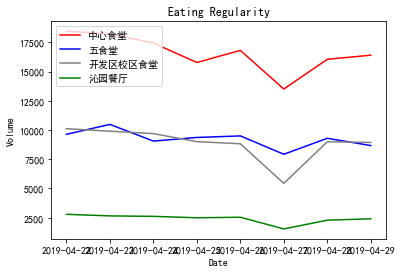

In [4]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

data = pd.read_table(r"ykt_jyrz_lishi.txt", sep=';')
data.to_csv('ykt_jyrz_lishi.csv',index=False)

f=open('ykt_jyrz_lishi.csv',encoding='utf-8')
s=pd.read_csv(f)
s=s.drop(200370)
s= s.drop(s[s['JYRQ'] == '2020-01-26'].index)

name1=['中心食堂一层','中心食堂二层','中心食堂三层','中心食堂清真']
name2=['五食堂一层','五食堂二层','五食堂三层']
name3=['开发区校区食堂']
name4=['沁园餐厅']

def count(name):
  a1=s.loc[s['JYDD'].isin(name)]
  a1['JYRQ']=pd.to_datetime(a1['JYRQ'])
  a1=a1.set_index('JYRQ')
  sum=a1.groupby('JYRQ')['JYDD'].count()
  attr=sum.index.strftime('%Y-%m-%d')
  return attr,sum.values

plt.plot(count(name1)[0],count(name1)[1],color="red",label='中心食堂')
plt.plot(count(name2)[0],count(name2)[1],color="blue",label='五食堂')
plt.plot(count(name3)[0],count(name3)[1],color="grey",label='开发区校区食堂')
plt.plot(count(name4)[0],count(name4)[1],color="green",label='沁园餐厅')
plt.title('Eating Regularity')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend(loc=2)
plt.show()


D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead.
  """


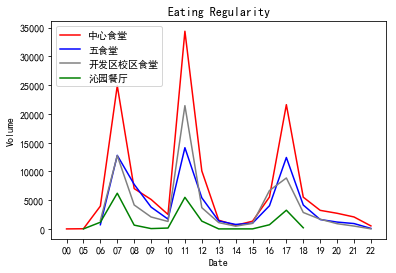

In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

data = pd.read_table("ykt_jyrz_lishi.txt", sep=';')
data.to_csv('ykt_jyrz_lishi.csv',index=False)

f=open('ykt_jyrz_lishi.csv',encoding='utf-8')
df=pd.read_csv(f)

name1=['中心食堂一层','中心食堂二层','中心食堂三层','中心食堂清真']
name2=['五食堂一层','五食堂二层','五食堂三层']
name3=['开发区校区食堂']
name4=['沁园餐厅']
name5=['七食堂1楼','七食堂2楼']
name6=['九食堂清真餐厅']
name7=['盘锦校区B12食堂','盘锦校区B13食堂']

df=df[['JYDD','JYSJ']]
df['JYSJ'],df['SJ'] = df['JYSJ'].str.split(' ',1).str
df['SJ'],df['H']=df['SJ'].str.split(':',1).str

def count(name):
 a1=df.loc[df['JYDD'].isin(name)]
 a1=a1.set_index('SJ')
 sum=a1.groupby('SJ')['JYDD'].count()
 attr=sum.index
 return attr,sum.values

plt.plot(count(name1)[0],count(name1)[1],color="red",label='中心食堂')
plt.plot(count(name2)[0],count(name2)[1],color="blue",label='五食堂')
plt.plot(count(name3)[0],count(name3)[1],color="grey",label='开发区校区食堂')
plt.plot(count(name4)[0],count(name4)[1],color="green",label='沁园餐厅')
plt.title('Eating Regularity')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend(loc=2)

plt.show()
